# Logistic Regression by Karen John
## Preprocessing by Joscandy Nunez 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
data=pd.read_csv('/Users/karenjohn/Downloads/dataset_phishing.csv')
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [3]:
#Completed by Joscandy
from sklearn import preprocessing

# encode data
# temporarily turn text like "phishing" and "legitimate" into numbers 1 and 0, respectively
le = preprocessing.LabelEncoder()
le.fit(["phishing", "legitimate"]) # status of url is the corresponding feature, our target class
transformedClass = le.transform(data.status[:].values) # get the new values
print("text values ", data.status[:].values, "become ", transformedClass)
data['status'] = transformedClass # swap the old values with the new encoded values


text values  ['legitimate' 'phishing' 'phishing' ... 'legitimate' 'legitimate'
 'phishing'] become  [0 1 1 ... 0 0 1]


In [4]:
#Compelted by Joscandy
#features we are using for training the model, which is a mixture of ints and floats
X = data[['https_token', 'ratio_digits_url', 'nb_hyphens', 'nb_dots', 'nb_underscore', 'nb_slash']]
# target class
y = data['status']

print("---------------FEATURES---------------------")
print(X)

print("---------------TARGET---------------------")
print(y)

---------------FEATURES---------------------
       https_token  ratio_digits_url  nb_hyphens  nb_dots  nb_underscore  \
0                1          0.000000           0        3              0   
1                1          0.220779           0        1              0   
2                0          0.150794           1        4              2   
3                1          0.000000           0        2              0   
4                1          0.000000           2        2              0   
...            ...               ...         ...      ...            ...   
11425            1          0.000000           0        2              0   
11426            1          0.023810           0        5              0   
11427            0          0.142857           6        2              1   
11428            1          0.000000           0        2              0   
11429            1          0.085954           0       24             18   

       nb_slash  
0             3  
1     

In [5]:
standared_scaler = StandardScaler()
X = standared_scaler.fit_transform(X)



In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [7]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
lr = LogisticRegression(random_state=1234)
lr.fit(X_train, y_train)

result = lr.predict(X_test)
print(classification_report(y_test, result))
print(accuracy_score(y_test,result))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1407
           1       0.79      0.64      0.71      1451

    accuracy                           0.73      2858
   macro avg       0.74      0.73      0.73      2858
weighted avg       0.74      0.73      0.73      2858

0.7288313505948215


[[1155  252]
 [ 523  928]]


<AxesSubplot: >

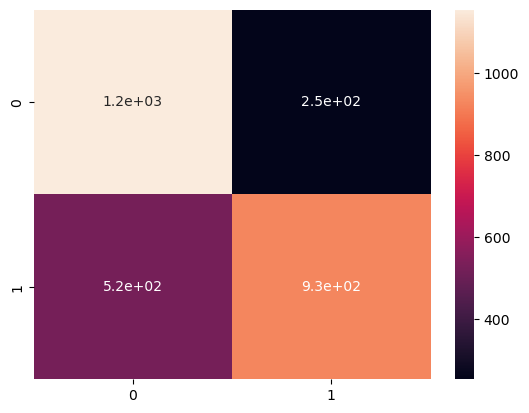

In [8]:
#print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,result))
sns.heatmap(confusion_matrix(y_test,result),annot=True)

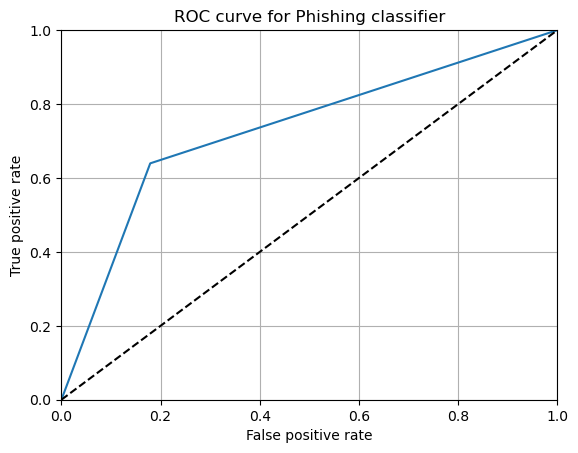

In [9]:
#print ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, result)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Phishing classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid(True)

In [10]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,result)

0.7302272236337266

In [13]:
parameter_grid_logistic_regression = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      # Number of iterations
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   # Algorithms
    'class_weight': ['balanced']                                    # Type of weight
} 

In [14]:
#Use of GridSearch to performance tune and find the best parameters for performance
logistic_Model_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=parameter_grid_logistic_regression, verbose=1, 
                    cv=10, n_jobs=-1)
 
logistic_Model_grid.fit(X_train, y_train)
 
print("Best performance score for the model after tuning is: ",logistic_Model_grid.best_score_)
print("Best parameters for the model is :",logistic_Model_grid.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best performance score for the model after tuning is:  0.7323847486624615
Best parameters for the model is : LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234,
                   solver='newton-cg')
